In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# Data Loading and Cleaning

In [3]:
df = pd.read_csv('wine.csv')
df.drop_duplicates()
df = df.drop_duplicates().reset_index(drop=True)
#df['high_or_low'] = df['quality'].apply(lambda x: 'high' if x >= 7 else 'low')

# tsne 1 (Prof's code modified)

In [4]:
# define the variables to be standardized
vars_to_standardize = ['fixed.acidity', 'volatile.acidity', 'citric.acid', 'residual.sugar', 'chlorides', 'free.sulfur.dioxide', 'total.sulfur.dioxide', 'density', 'pH', 'sulphates', 'alcohol']

# create a scaler object
scaler = StandardScaler()

# fit and transform the data
df[vars_to_standardize] = scaler.fit_transform(df[vars_to_standardize])

# specify the hyperparameters. For example, we can start with a perplexity of 30 
# and a learning rate (also called epsilon) of 200. These are common starting values for tSNE.
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000, learning_rate=200)

# run t-SNE on the standardized data
tsne_results = tsne.fit_transform(df[vars_to_standardize])

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 5320 samples in 0.006s...
[t-SNE] Computed neighbors for 5320 samples in 0.642s...
[t-SNE] Computed conditional probabilities for sample 1000 / 5320
[t-SNE] Computed conditional probabilities for sample 2000 / 5320
[t-SNE] Computed conditional probabilities for sample 3000 / 5320
[t-SNE] Computed conditional probabilities for sample 4000 / 5320
[t-SNE] Computed conditional probabilities for sample 5000 / 5320
[t-SNE] Computed conditional probabilities for sample 5320 / 5320
[t-SNE] Mean sigma: 0.694244
[t-SNE] KL divergence after 250 iterations with early exaggeration: 80.808128
[t-SNE] KL divergence after 1000 iterations: 1.557989


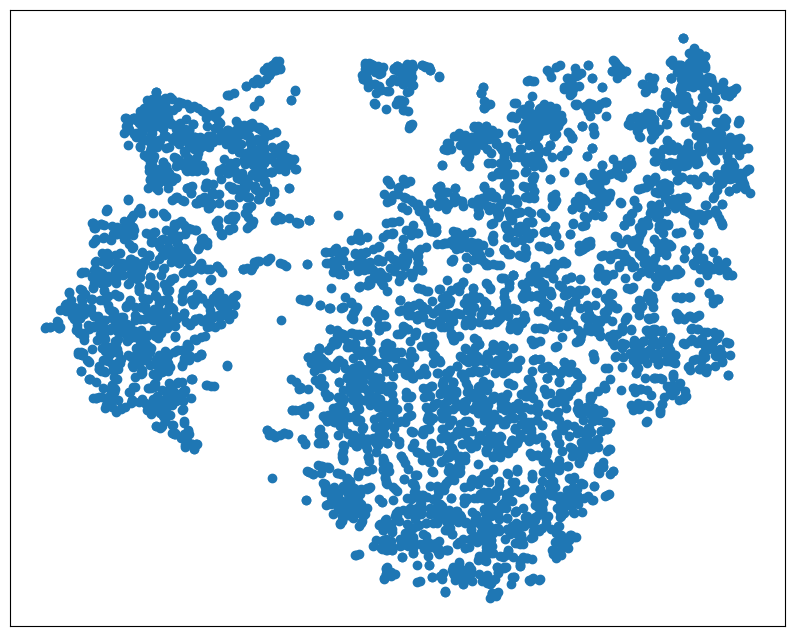

In [4]:
# create a scatter plot
plt.figure(figsize=(10,8))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.show()

In [6]:
# Not super helpful because we don't know what the points are
# convert the t-SNE results to a DataFrame
tsne_df = pd.DataFrame(data = tsne_results, columns = ['Dim1', 'Dim2'])

# add the county names to this DataFrame
tsne_df['color'] = df['color'].values

# create an interactive plot
fig = px.scatter(tsne_df, x='Dim1', y='Dim2', hover_data=['color'])
fig.show()


In [7]:
df['quality'] = df['quality'].astype(int)
df['grade'] = 'low'
df.loc[df['quality'] > 6, 'grade'] = 'high'

#df['high_or_low'] = df['quality'].apply(lambda x: 'high' if x >= 7 else 'low')

# add the categories to this DataFrame
tsne_df['Category'] = df['grade'].values

fig = px.scatter(tsne_df, x='Dim1', y='Dim2', color='Category', hover_data=['color'])
fig.show()

With tsne white and red wine split pretty nicely along the gap around -30 on Dim1.
High quality wines (colored in red) are still mixed amongst low quality wines. 


# tsne 2 using chatgpt

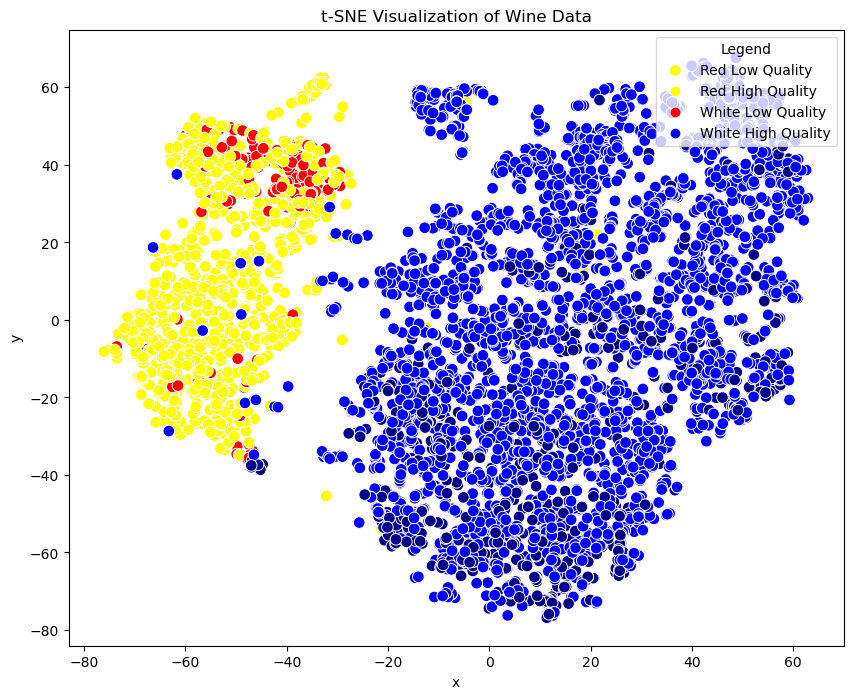

In [8]:
df['high_or_low'] = df['quality'].apply(lambda x: 'high' if x >= 7 else 'low')
# Extract the features for t-SNE
features = df.iloc[:, :11]

# Run t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_result = tsne.fit_transform(features)

# Create a new dataframe with the t-SNE results
tsne_df = pd.DataFrame(tsne_result, columns=["x", "y"])
tsne_df["color"] = df["color"]
tsne_df["high_or_low"] = df["high_or_low"]

# Create new categories for color and high_or_low
tsne_df["category"] = tsne_df["color"] + " " + tsne_df["high_or_low"]

# Define the color palette
color_palette = {"red low": "yellow", "red high": "red", "white low": "blue", "white high": "darkblue"}

# Plot the t-SNE results
plt.figure(figsize=(10, 8))
sns.scatterplot(data=tsne_df, x="x", y="y", hue="category", palette=color_palette, s=70)
plt.title("t-SNE Visualization of Wine Data")
plt.legend(title="Legend", loc="upper right", labels=["Red Low Quality", "Red High Quality", "White Low Quality", "White High Quality"])
plt.show()


We get a similar looking plot here. The legend is messed up, but again, red and white split pretty nicely but not quality.

# PCA

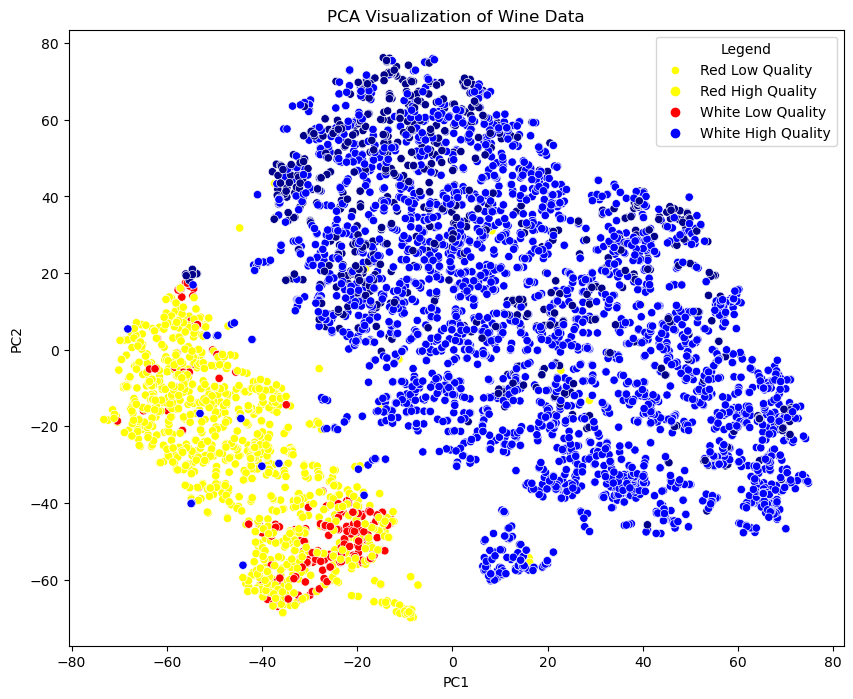

In [9]:
# this combines all four categories: red low, red high, white low, and white high

# Define the color categories
color_categories = ["red low", "red high", "white low", "white high"]

# Create a subset DataFrame with the specified categories
subset_df = tsne_df[tsne_df["category"].isin(color_categories)]

# Extract the features for PCA
features = subset_df.iloc[:, :2]

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features)

# Create a new DataFrame with the PCA results
pca_df = pd.DataFrame(pca_result, columns=["PC1", "PC2"])
pca_df["category"] = subset_df["category"]

# Define the color palette for the categories
color_palette = {"red low": "yellow", "red high": "red", "white low": "blue", "white high": "darkblue"}

# Plot the PCA results
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="category", palette=color_palette)
plt.title("PCA Visualization of Wine Data")
plt.legend(title="Legend", loc="upper right", labels=["Red Low Quality", "Red High Quality", "White Low Quality", "White High Quality"])
plt.show()

This has all four categories and shows similar results to tsne. Pretty clear split between the colors but not quality.

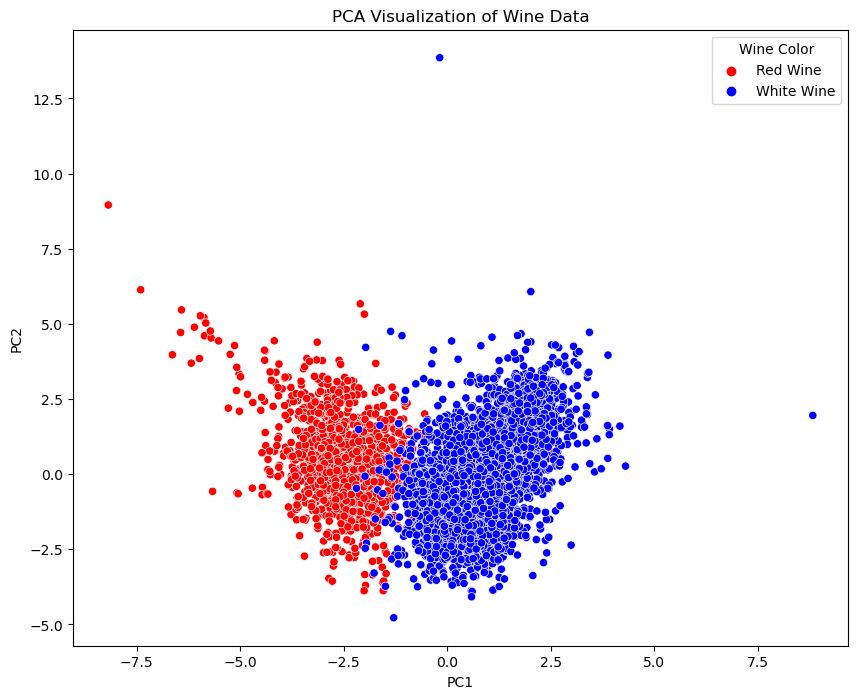

In [10]:
# red vs white

# Extract the features for PCA
features = df.iloc[:, :11]

# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Perform PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# Create a new dataframe with the PCA results
pca_df = pd.DataFrame(pca_result, columns=["PC1", "PC2"])
pca_df["color"] = df["color"]
pca_df["quality"] = df["quality"]

# Create a color map for labeling
color_labels = {
    "red": "Red Wine",
    "white": "White Wine"
}
pca_df["color_label"] = pca_df["color"].map(color_labels)

# Plot the PCA results
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="color_label", palette={"Red Wine": "red", "White Wine": "blue"})
plt.title("PCA Visualization of Wine Data")
plt.legend(title="Wine Color", loc="upper right")

plt.show()


This is if you only looking at the color. We can see a pretty good split here.

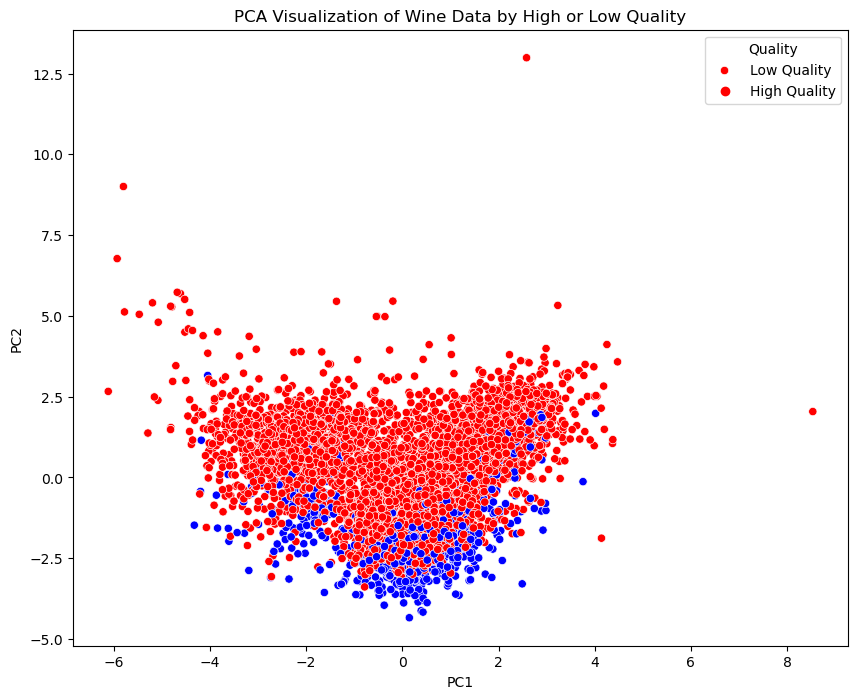

In [11]:

# Extract the features for PCA
features = df.iloc[:, 1:12]  # Exclude the 'quality' column

# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Run PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_features)

# Create a new dataframe with the PCA results
pca_df = pd.DataFrame(pca_result, columns=["PC1", "PC2"])
pca_df["high_or_low"] = df["high_or_low"]

# Plot the PCA results
plt.figure(figsize=(10, 8))
sns.scatterplot(data=pca_df, x="PC1", y="PC2", hue="high_or_low", palette={"low": "red", "high": "blue"})
plt.title("PCA Visualization of Wine Data by High or Low Quality")
plt.legend(title="Quality", loc="upper right", labels=["Low Quality", "High Quality"])
plt.show()


Quality is a bit more mixed and not as clear. It looks like there is a big overlap and maybe a lot of blue dots are under red

# K-means

/Users/choi/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



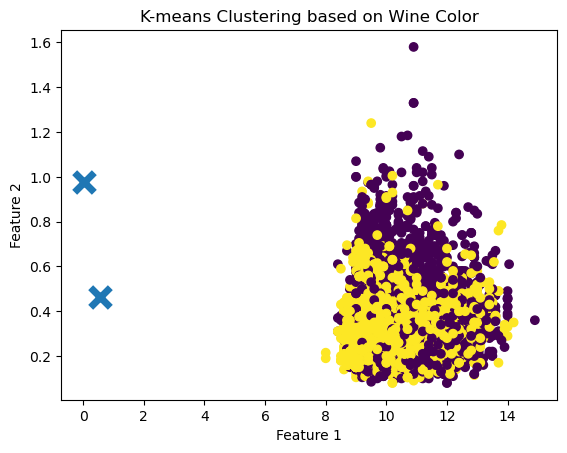

In [12]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the dataset
df = pd.read_csv('wine.csv')

# Drop the 'quality' column
X = df.drop(['quality'], axis=1)

# Define the columns to be one-hot encoded
categorical_columns = ['color']

# Create a ColumnTransformer to handle one-hot encoding
transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns)
    ], remainder='passthrough')

# Fit and transform the data
X_transformed = transformer.fit_transform(X)

# Run K-Means
kmeans = KMeans(n_clusters=2, random_state=1)
cluster_labels = kmeans.fit_predict(X_transformed)

# Add cluster labels to DataFrame
df['cluster'] = cluster_labels

# Plot the clusters
plt.scatter(df['alcohol'], df['volatile.acidity'], c=df['cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker="x", s=200, linewidths=5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering based on Wine Color')
plt.show()


In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Load the dataset
df = pd.read_csv('wine.csv')

# Create a new column 'high_or_low'
df['high_or_low'] = df['quality'].apply(lambda x: 'high' if x >= 7 else 'low')

# Drop columns that are not needed for clustering
X = df.drop(['quality', 'high_or_low', 'color'], axis=1)

# Define the columns to be one-hot encoded
categorical_columns = ['high_or_low']

# Create a ColumnTransformer to handle one-hot encoding
transformer = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(), categorical_columns)
    ], remainder='passthrough')

# Fit and transform the data
X_transformed = transformer.fit_transform(X)

# Run K-Means
kmeans = KMeans(n_clusters=2, random_state=1)
cluster_labels = kmeans.fit_predict(X_transformed)

# Add cluster labels to DataFrame
df['cluster'] = cluster_labels

# Plot the clusters
plt.scatter(df['alcohol'], df['volatile.acidity'], c=df['cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker="x", s=200, linewidths=5)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-means Clustering based on Wine Quality')
plt.show()
